# Visualization

## Topics
1. Matplotlib core framework
2. Pandas plot()
3. Seaborn statistical visualization
4. (not covered) Grammar of graphics (ggplot2 see plotnine )
5. (not covered) Interactive plotting

## Resources
1. Ch 9 in Python for Data Analysis, 2nd Ed, Wes McKinney (UCalgary library and https://github.com/wesm/pydata-book)
2. Ch 4 in Python Data Science Handbook, Jake VanderPlas (Ucalgary library and https://github.com/jakevdp/PythonDataScienceHandbook)
3. Fundamentals of Data Visualization, Claus O. Wilke (Ucalgary library and https://serialmentor.com/dataviz/index.html)
4. Overview by Jake VanderPlas https://www.youtube.com/watch?v=FytuB8nFHPQ


## Matplotlib
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
Matplotlib tries to make easy things easy and hard things possible.  
For simple plotting the pyplot module provides a MATLAB-like interface

https://matplotlib.org

Importing matplotlib looks like this

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt



### Two interfaces
There are two ways to interact with Matplot lib: a Matlab style and an object oriented style interface.

See Ch 4 in Python Data Science Handbook, Jake VanderPlas

- Two Interfaces for the Price of One, pp. 222
- Matplotlib Gotchas, pp. 232

### Matlab style interface

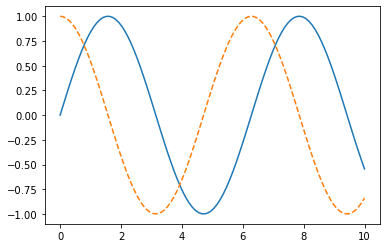

In [2]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Adding decorations to the plot is done by repeatatly calling functions on the imported `plt` module. All calls within the cell will be applied to the current figure and axes.

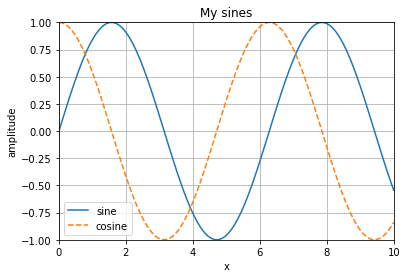

In [3]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label ='cosine')

plt.xlim([0, 10])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

### Object oriented interface 

With this interface, you first create a figure and an axes object, then call their methods to change the plot.

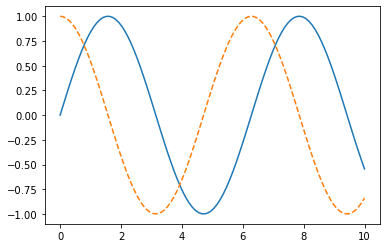

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--');

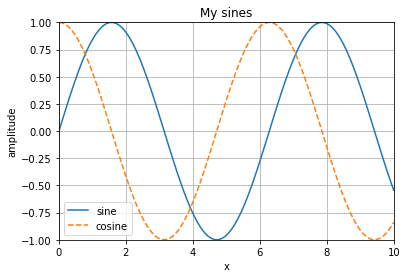

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 10], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

### Save to file 
With the figure object at hand, we can save to file

In [6]:
fig.savefig('sines.pdf')

In [7]:
!ls *.pdf

sines.pdf


## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's load the heart attack dataset

In [4]:
data = pd.read_csv('auto-mpg.csv', na_values='?')
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot:>

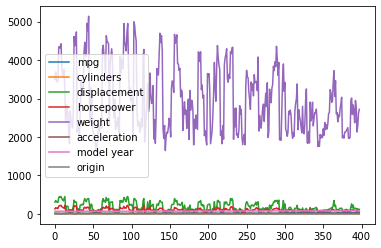

In [9]:
data.plot()

Let's look at the age distribution (a histogram)

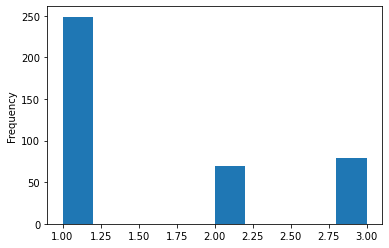

In [10]:
data['origin'].plot.hist();

How many male and female samples do we have?

In [11]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Notice that we accessed the gender column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

Do we have similar ages in females and males?  
Plotting two histograms for each gender side beside directly form the dataframe:

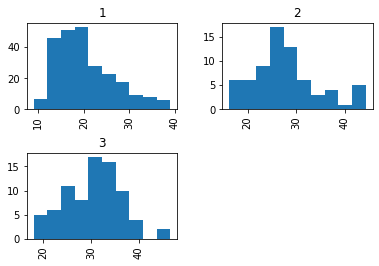

In [12]:
axs = data.hist(column='mpg', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

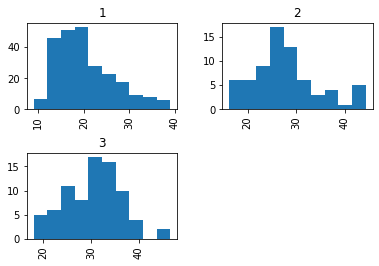

In [13]:
axs = data.hist(column='mpg', by='origin')
# axs[1].set(title='1', ylim=[0, 45])
# axs[2].set(title='2', ylim=[0, 45]);
# axs[3].set(title='3', ylim=[0, 45]);

Scatter plot for the number of horsepower in a car model based on the origin

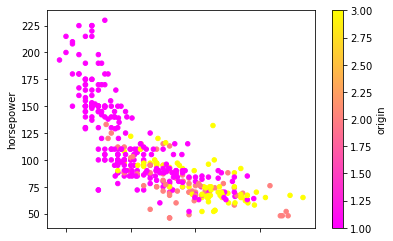

In [14]:
data.plot.scatter('mpg','horsepower', c='origin', colormap='spring');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

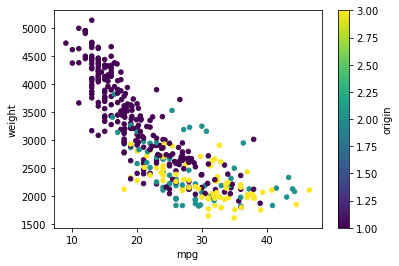

In [15]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'weight', c='origin', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know gender is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


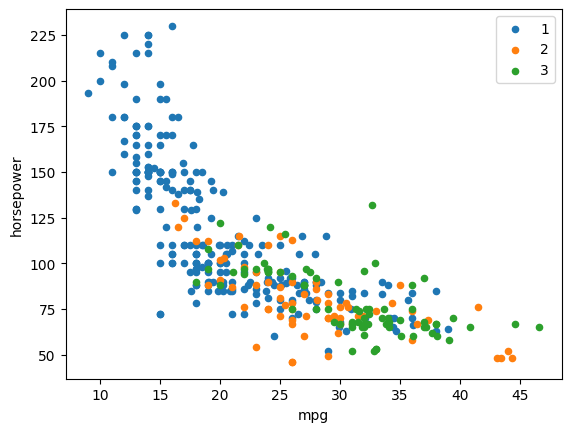

In [19]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
i = 1
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', color = colors[i], label=key, ax=ax)
    i += 1

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [20]:
import seaborn as sns

Let's re-create the histograms by origin with seaborn with the figure level `displot()` function.

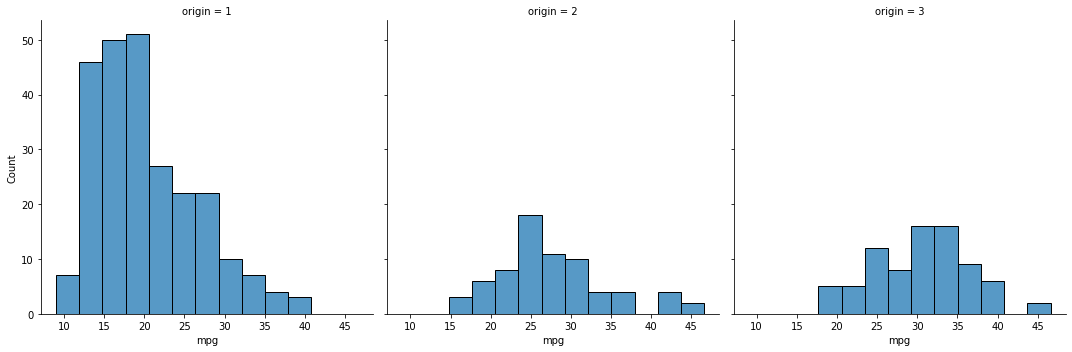

In [21]:
# check out the number of cars based on the mpg as well as its origin
sns.displot(x='mpg', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

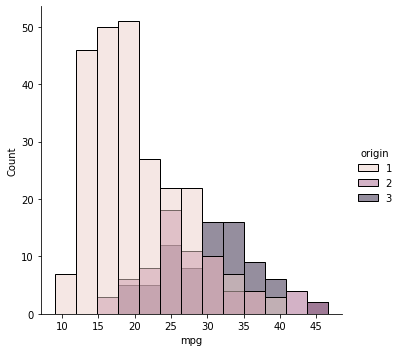

In [22]:
# use the count for the 
sns.displot(x='mpg', hue='origin', data=data);

To have an idea of the split the cars of different models, we can stack the counts, adding up to total.

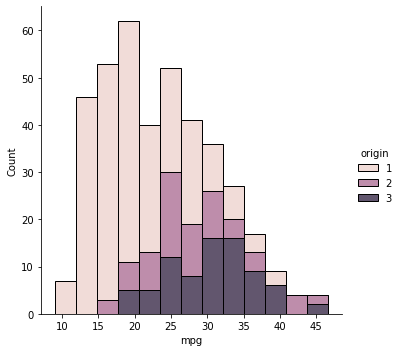

In [26]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences in mpg with a boxplot too

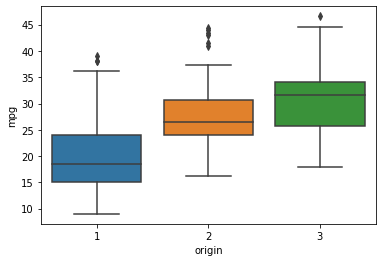

In [21]:
sns.boxplot(x='origin', y='mpg', data=data);

Let's re-create the scatter plot to see if mpg and weight are correlated by origin.

To make the legend show strings we will create a origin string column with mpg and weight strings rather than 0 and 1.

In [27]:
data['origin_str'] = data['origin'].replace()

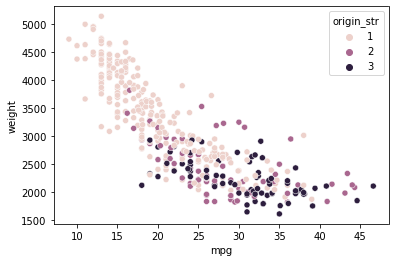

In [28]:
ax = sns.scatterplot(x='mpg', y='weight', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

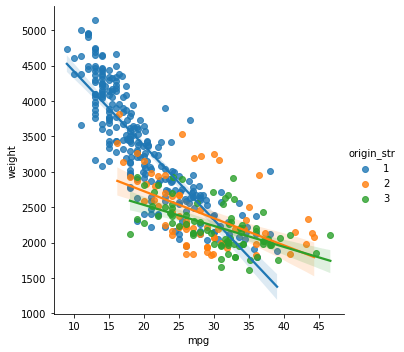

In [29]:
ax = sns.lmplot(x='mpg', y='weight', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

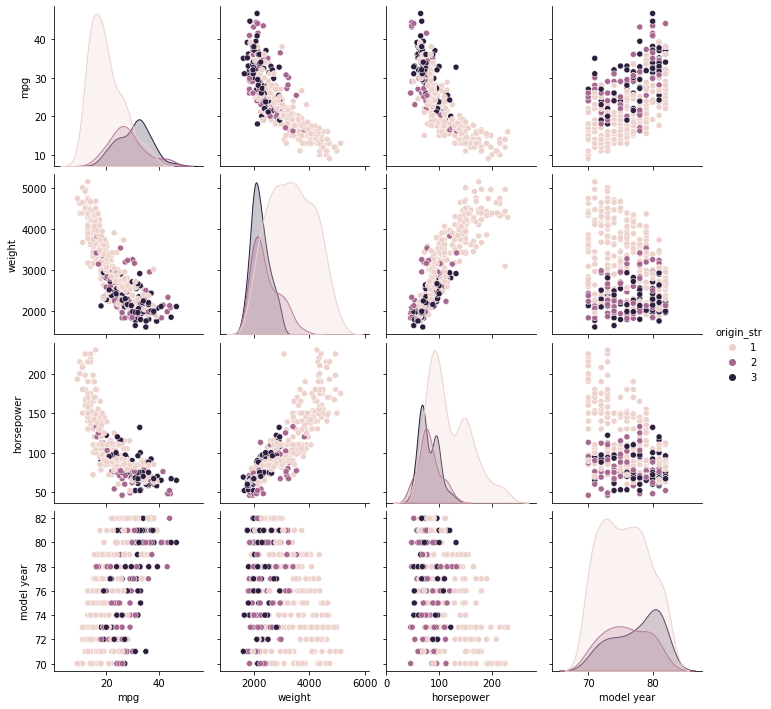

In [39]:
sns.pairplot(data, vars=['mpg', 'weight', 'horsepower', 'model year'], hue='origin_str');
# sns.pairplot(data, vars=['mpg', 'weight', 'horsepower', 'model year');

As an alternative, we can visualize the correlation matrix as a heatmap

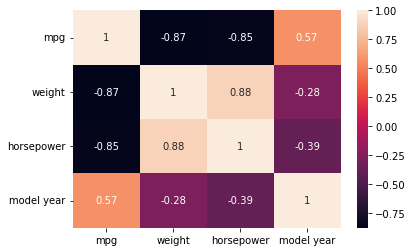

In [40]:
g = sns.heatmap(data[['mpg', 'weight', 'horsepower', 'model year']].corr(method='spearman'), 
            annot=True)

There are nice tutorials on the Seaborn website, be sure to check these out.